<div align="center">
    <h1>Taller de Computación Científica en Python - 2025</h1>
    <img src="https://www.iycr2014.org/__data/assets/image/0014/133052/logo_cenat.png" alt="Logo CENAT" style="width: 200px;"/>
    
</div>

---

## Análisis de Mercado: Estudio y modelado de Apple en la bolsa de valores

<center> <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flevels.io%2Fcontent%2Fimages%2F2021%2F05%2FScreen-Shot-2021-05-01-at-12.33.30-PM.png&f=1&nofb=1&ipt=70932c1eda589be626fbd7fd451e76e08ddffbf905f4576e82babd4035a384f2&ipo=images" alt="image info" width="500"/> </center>

En la modernidad, uno de los fenómenos de mayor interés, por su volatilidad e impacto económica, es el comportamiento de la bolsa de valores. Si se quiere estudiar el comportamiento de una empresa, sea Apple, en la bolsa de valores a lo largo de varios años para detectar comportamiento y fenómenos del mercado, se puede extraer su información y realizar el respectivo análisis de datos con las herramientas que hemos aprendido a lo largo del taller.

Datos extraídos de Yahoo Finance a través de `yfinance`.

---

**Realizado por:**  
Julián Sánchez

In [41]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

## 1. Importar la información financiera

Gracias a `yfinance` podemos acceder a la información del mercado de cualquier empresa en bolsa en el lapso temporal de nuestro interés.

In [42]:
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2021-01-01"

# Se descarga la información como un dataframe
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


## 2. Depurar la información

Hay que asegurarnos que la información que importamos se encuentra en buen estado para ser procesada

In [43]:
# Primero se observa cómo está estructurada la información
print(data.head())

# Para analizarla, es importante saber que está completa
print("\n Datos no válidos:\n")
print(data.isnull().sum())

# En caso de valores no numéricos, se eliminan
data = data.dropna()


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.347172  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.661268  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.663502  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  23.995319  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.917269  237458000

 Datos no válidos:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## 3. Graficar el comportamiento de los indicadores en el tiempo

Se puede graficar cómo se va comportando el valor de apertura, cierre, bajos y máximos respecto al tiempo.

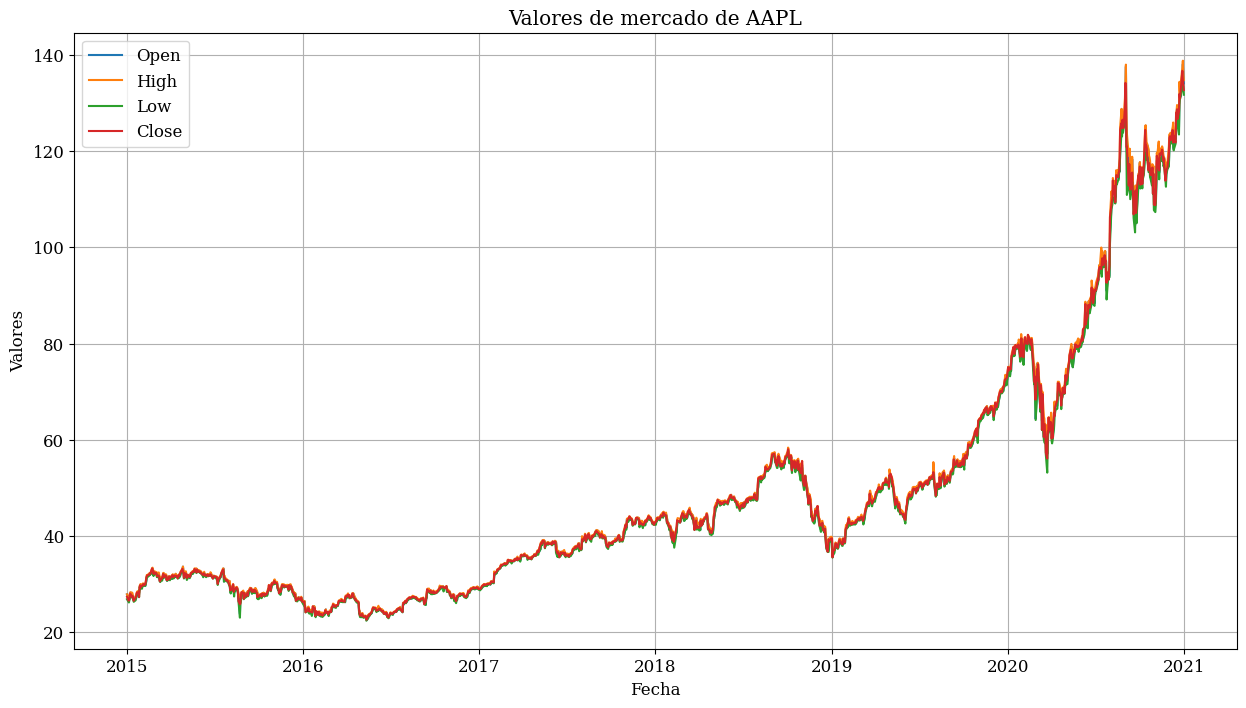

In [44]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

plt.figure(figsize=(15, 8))

plt.plot(data.index, data['Open'], label='Open')
plt.plot(data.index, data['High'], label='High')
plt.plot(data.index, data['Low'], label='Low')
plt.plot(data.index, data['Close'], label='Close')

plt.title(f'Valores de mercado de {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.grid(True)
plt.legend()
plt.show()


Sabiendo esto, podemos calcular y agregar una columna que describa qué tan rápido suben o bajan estos valores de cierre por medio de su derivada. Esto dependerá de la aplicación, puesto que conocer la tasa de cambio es súper importante al momento de decidir sobre qué empresas pueden brindar mayor estabilidad a las inversiones.

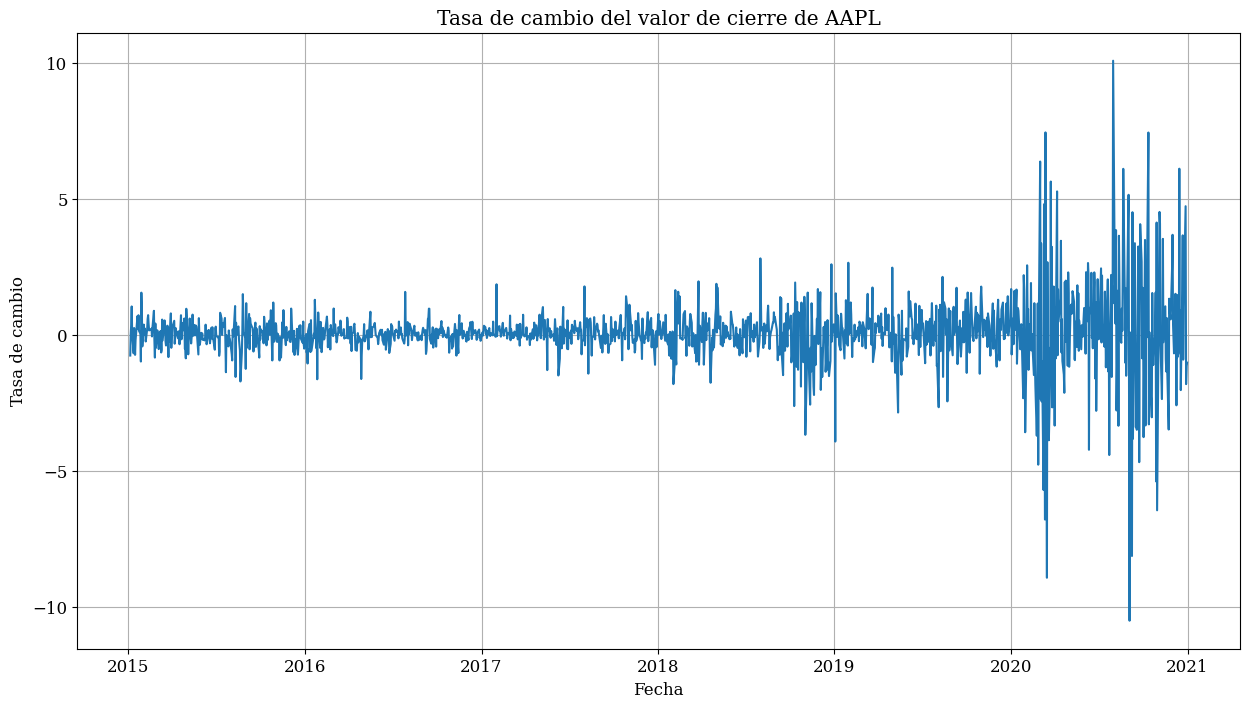

In [45]:
data['Close change'] = data['Close'].diff()
data.dropna(inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Close change'])
plt.title(f'Tasa de cambio del valor de cierre de {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio')
plt.grid(True)
plt.show()


## 4. Decidir sobre la información que tenemos

Ya con esto se puede ir extrayendo información, por ejemplo, a partir de 2020 se empezó a ver un cambio más drástico entre los valores de cierre en días sucesivos. Por lo mismo, se puede intentar estudiar su distribución:

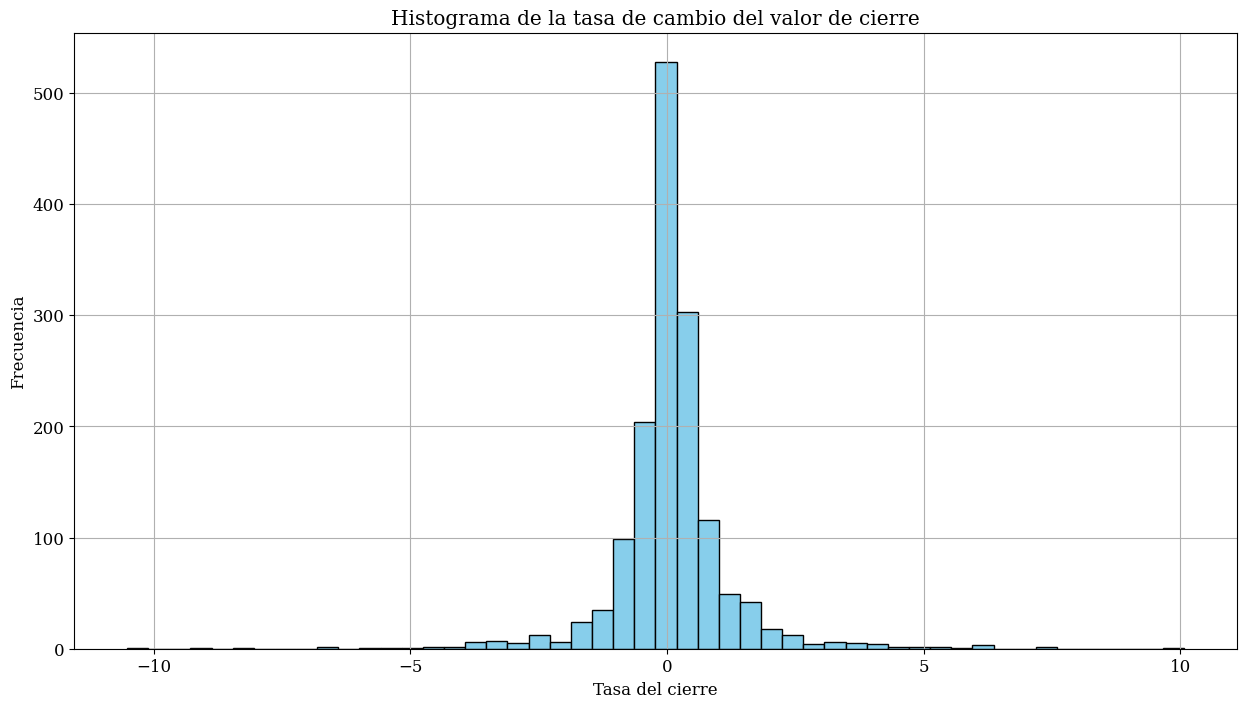

In [46]:
plt.figure(figsize=(15, 8))
plt.hist(data['Close change'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de la tasa de cambio del valor de cierre')
plt.xlabel('Tasa del cierre')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

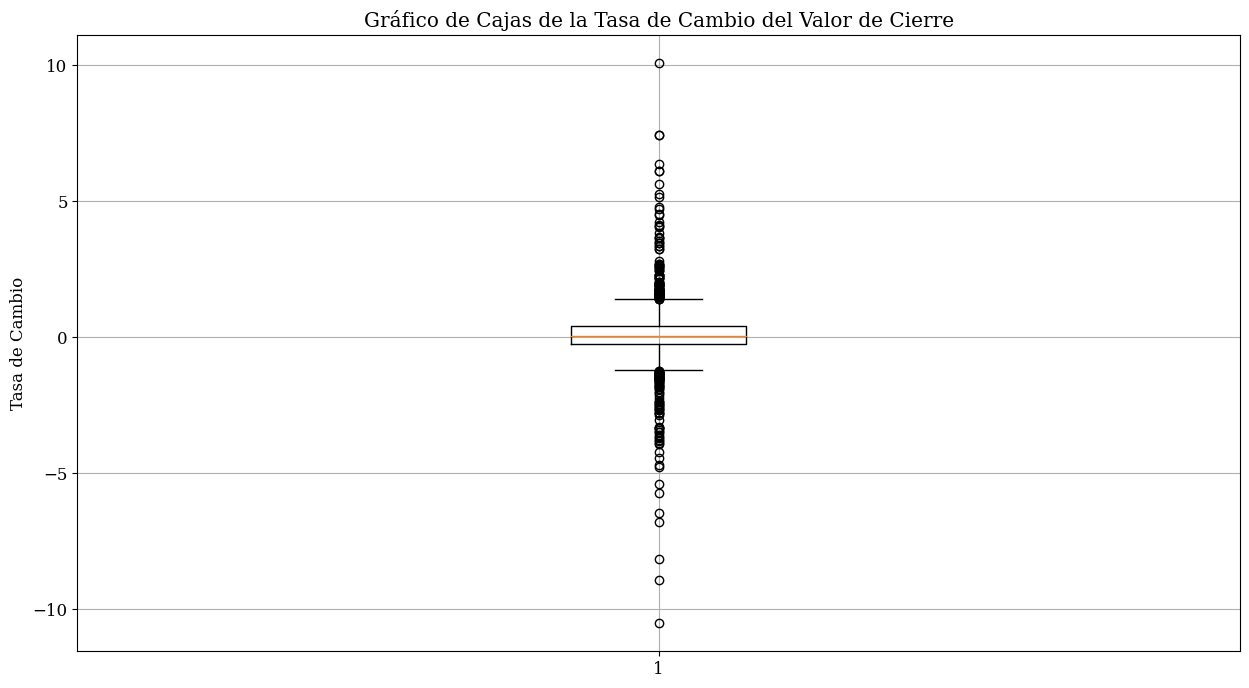

In [47]:
# Crear el gráfico de cajas
plt.figure(figsize=(15, 8))
plt.boxplot(data['Close change'])
plt.title('Gráfico de Cajas de la Tasa de Cambio del Valor de Cierre')
plt.ylabel('Tasa de Cambio')
plt.grid(True)
plt.show()

Acá se observa que hay bastantes **valores atípicos**, lo cual es esperable de un sistema que **en teoría no puede ser predecido a puntualidad**.

## 5. Obtener un ajuste por medio de una distribución probabilística

Se observa además, que hay una distribución centrada en 0, con una variación estimada entre -5 y 5 que se asemeja mucho a una *distribución t-Student*. Por lo mismo, se puede emplear un ajuste a la distribución y el cálculo de sus parámetros:

Parámetros de la distribución t-Student:
Grados de libertad (df): 1.5405252499096687
Localización (loc): 0.04307475266533004
Escala (scale): 0.40331475514764914


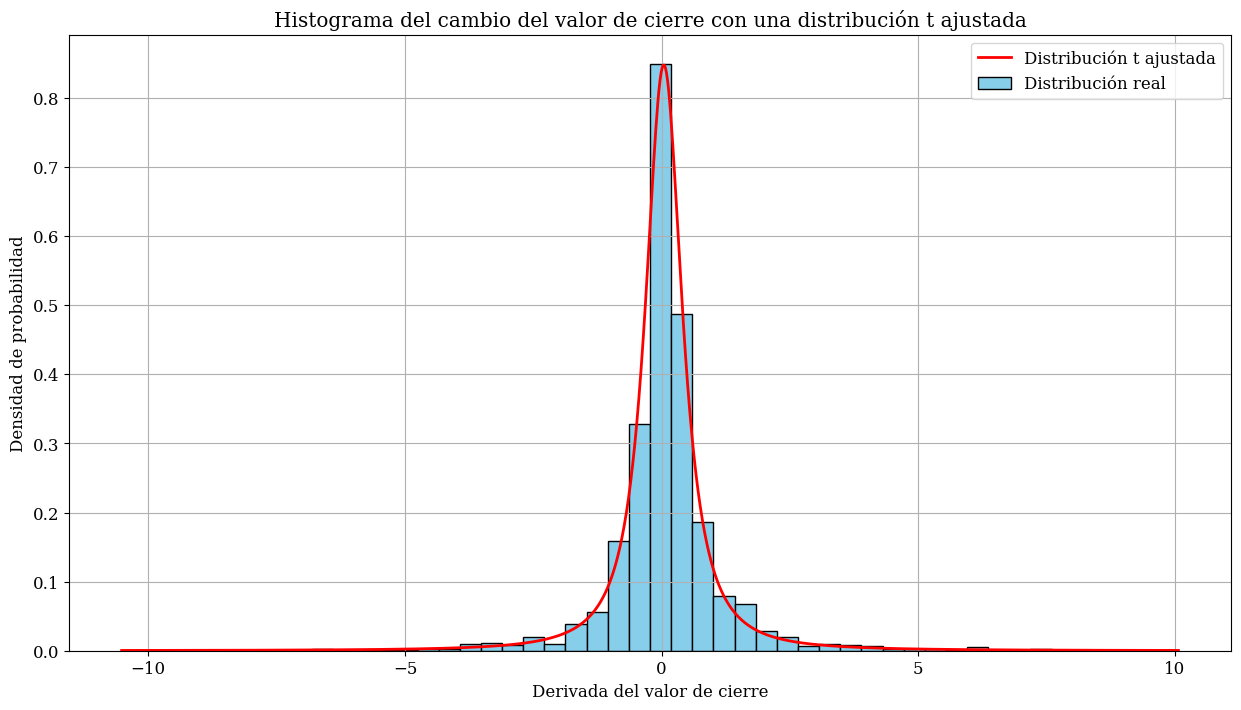

In [48]:
# Se emplea un ajuste por medio de la distribución t-Student
params = t.fit(data['Close change'])

# Se devuelven los parámetros ajustados
df, loc, scale = params
print("Parámetros de la distribución t-Student:")
print("Grados de libertad (df):", df)
print("Localización (loc):", loc)
print("Escala (scale):", scale)

# Se grafica el ajuste
x = np.linspace(data['Close change'].min(), data['Close change'].max(), 1000)
plt.figure(figsize=(15, 8))
plt.plot(x, t.pdf(x, df, loc, scale), 'r-', lw=2, label='Distribución t ajustada')
plt.hist(data['Close change'], bins=50, density=True, color='skyblue', edgecolor='black', label='Distribución real')

plt.title('Histograma del cambio del valor de cierre con una distribución t ajustada')
plt.xlabel('Derivada del valor de cierre')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

Véase que esta función describe bastante bien la distribución de probabilidad del cambio del valor de cierre, con una forma bastante simétrica y muy punteada en el no cambio, con un ligera desviación a la derecha (0.04). Sin embargo, no es muy fiable dado que se calculan bajos grados de libertad, por lo que no sería un buen predictor. Sin embargo, por el gusto del arte, hagámoslo:

## 6. ¡ ~~Intento de~~ Predicción!


Intentemos predecir a los siguientes 2 años (2021-2023) cómo se comportaría el cambio de los valores de cierre de Apple en el mercado. Esto se hace generando un número de sucesos aleatorios, 365 por cada año (por los días hábiles en que abre y cierra el mercado). Luego se generan los valores de prueba por medio de `t.rvs`. Además se pueden calcular los percentiles al 1% y 99%, que pueden ser útiles para estudiar la variabilidad de esta predicción. Finalmente se grafica esta predicción apendada.

Percentil 1%: -4.2450098239730005
Percentil 99%: 4.331159329303657


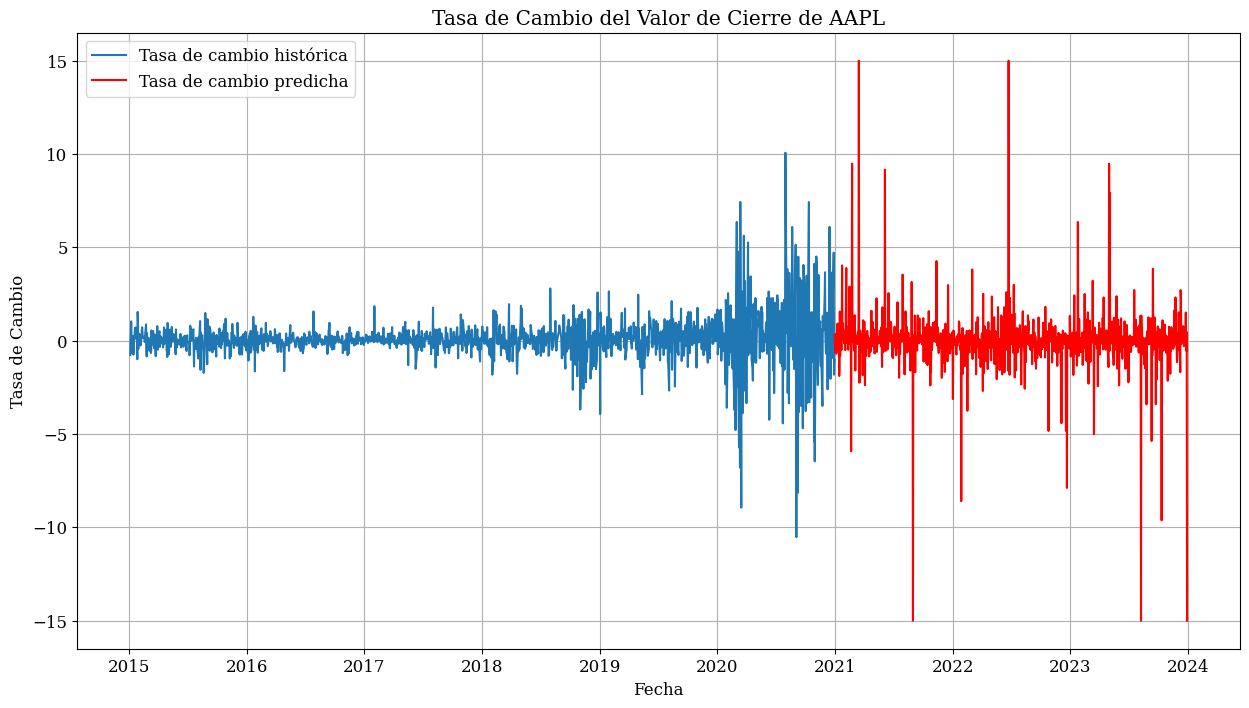

In [65]:
n_years = 3
max_change = 15

# Se generan muestras aleatorias basadas en la distribución t ajustada
n_samples = n_years * 365

samples = t.rvs(df, loc=loc, scale=scale, size=n_samples)
samples = np.clip(samples, -max_change, max_change)

# Se calculan los percentiles 1% y 99% de la distribución t ajustada
percentile_1 = t.ppf(0.01, df, loc=loc, scale=scale)
percentile_99 = t.ppf(0.99, df, loc=loc, scale=scale)

print("Percentil 1%:", percentile_1)
print("Percentil 99%:", percentile_99)

# Se grafica el histórico
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Close change'], label='Tasa de cambio histórica')
plt.title(f'Tasa de Cambio del Valor de Cierre de {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Cambio')
plt.grid(True)

# Se trazan las muestras aleatorias
plt.plot(data.index[-1] + pd.to_timedelta(np.arange(n_samples), unit='D'), samples, 'r-', label='Tasa de cambio predicha')

plt.legend()
plt.show()

## 7. Evaluación de nuestra predicción

Ahora podemos evaluar la validez de nuestra predicción:

In [68]:
# Data hasta 2024

ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2024-01-02"
data_2024 = yf.download(ticker, start=start_date, end=end_date)
data_2024 = data_2024.dropna()
data_2024['Close change'] = data_2024['Close'].diff()
data_2024.dropna(inplace=True)


[*********************100%%**********************]  1 of 1 completed


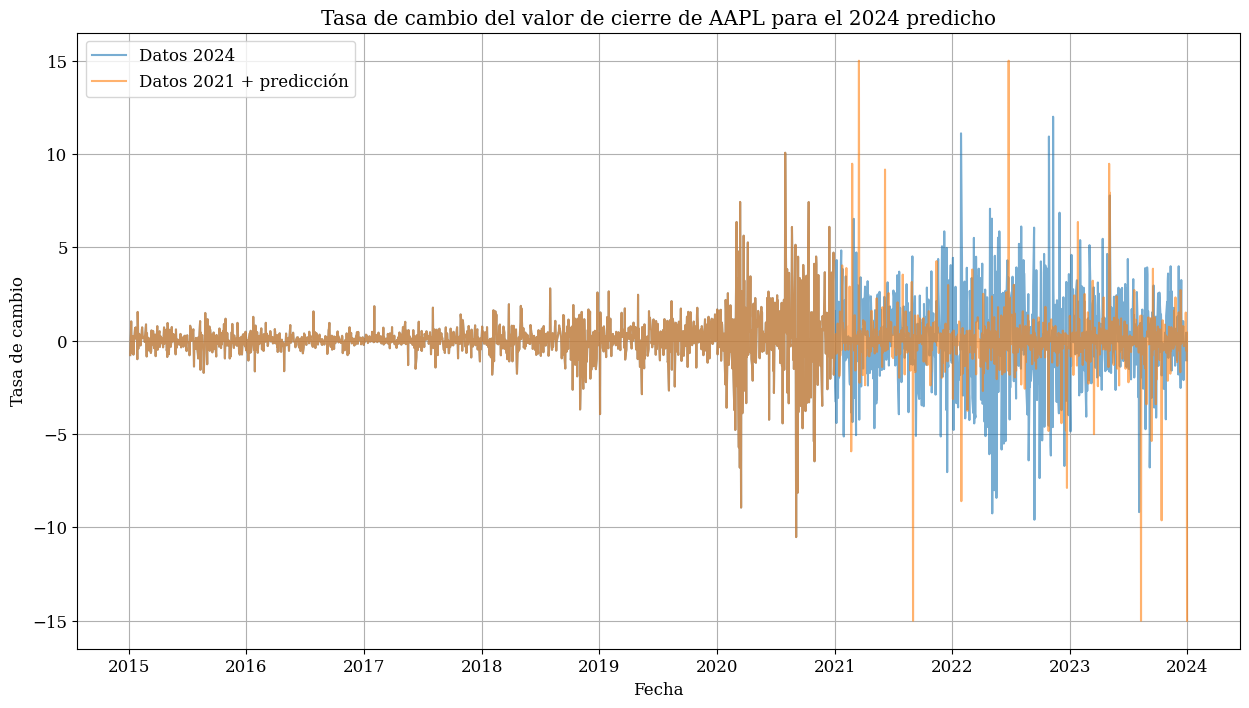

In [74]:
# Data hasta 2021 con predicción a 2024

# Limitar las muestras aleatorias dentro del rango de +-20 para recortar los anómalos
samples = np.clip(samples, -max_change, max_change)

# Se genera un índice de fechas para las muestras predichas
date_range = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_samples, freq='D')

# Se crea un DataFrame para las muestras predichas
predicted_data = pd.DataFrame({'Date': date_range, 'Close change': samples})
predicted_data.set_index('Date', inplace=True)

# Se fusionan los datos predichos con el DataFrame original
merged_data = pd.concat([data, predicted_data])

plt.figure(figsize=(15, 8))
plt.plot(data_2024.index, data_2024['Close change'],alpha=0.6,label='Datos 2024')
plt.plot(merged_data.index, merged_data['Close change'],alpha=0.6,label='Datos 2021 + predicción')
plt.title(f'Tasa de cambio del valor de cierre de {ticker} para el 2024 predicho')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio')
plt.grid(True)
plt.legend()
plt.show()


## 8. Conclusiones: Mal ajuste... ¡Como era de esperar!

El mercado es un tema de estudio de muchísimo interés, financiero y matemático, lo cual nace de su propia naturaleza caótica. Sin embargo, con estas herramientas de análisis de datos podemos observar por nosotros mismos cómo de volátil es, y también estar más informados en qué podemos hacer con él, sus limitaciones y sus ventajas. Si quisiéramos realizar mejores aproximaciones, necesitaríamos modelos muchísimo más complejos, y un acercamiento por modelos de inteligencia artificial sería preferible.